# Soil Colour Model for Soil Classification System
Think & Ink Education and Research Foundation


Prof. B. A. Patil
Director – R & D

Soumya Jahagirdar
Vaishakh Nargund
Research Assistants

R & D Project: 2019/R&D/Soil/RA/281/Confidential

# Magnitude spectrum for an audio signal
The audio sample used in the below code is provided with the code in the same folder and also can be downloaded from the link given below.
https://www.pacdv.com/sounds/voices/dinner-is-served.wav

This code gives the magnitude spectrum of selected audio file.

In [26]:
#Importing all the essential libraries

from scipy.io import wavfile
from scipy import signal
from skimage import util

In [ ]:
#Read the Audio file with .wav extension

#While loading the audio file, it gives the sampling rate as well as audio data as an (N, 2) array
rate, audio = wavfile.read('audio2.wav')

In [27]:
#Converting the audio to mono by averaging left and right channels

audio = np.mean(audio, axis=1)

Audio length: 2.10 seconds


Text(0, 0.5, 'Amplitude [unknown]')

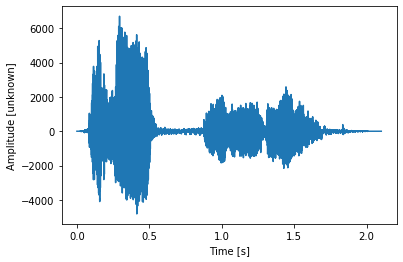

In [31]:
#Calculate length of audio snippet
N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')


#Plot the audio signal
f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]')

In [32]:
#The signal is splitted into slices of 1024 samples, each slice overlapping by 100 samples

M = 1024

slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

Audio shape: (92703,), Sliced audio shape: (917, 1024)


In [33]:
#Generating a window function and multiply it with signal

win = np.hanning(M + 1)[:-1]
slices = slices * win

In [34]:
#Take transpose to get one slice per column

slices = slices.T
print('Shape of `slices`:', slices.shape)

Shape of `slices`: (1024, 917)


In [35]:
#For each slice calculate DFT

spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


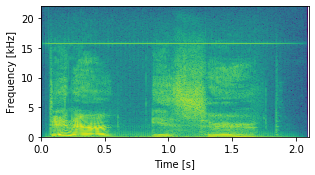

In [36]:
#log plot of the ratio of the signal divided by the maximum signal

f, ax = plt.subplots(figsize=(4.8, 2.4))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))

ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]');